In [1]:
import autorootcwd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
from src.data import spam
from src.evaluation import evaluate, search_knn, search_rf, search_xgboost

In [4]:
X_spam, y_spam = spam.prepare_data()
X_spam.shape, y_spam.shape

((4572, 7911), (4572,))

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_classif, chi2, f_classif

# ignore warnings
import warnings

warnings.filterwarnings("ignore")

# Initialize empty dictionaries to store the results
scoring_functions = {
    "f_regression": f_regression,
    "mutual_info_classif": mutual_info_classif,
    "chi2": chi2,
    "f_classif": f_classif,
}
score_values_knn = {score_func: [] for score_func in scoring_functions}
score_values_rf = {score_func: [] for score_func in scoring_functions}
score_values_xgb = {score_func: [] for score_func in scoring_functions}

X_train = X_spam
y_train = y_spam
X_train_pd = pd.DataFrame(X_spam)

# Iterate over different numbers of features
for k in tqdm(range(25, 150, 25)):  # Adjust the range and step size according to your needs
    for score_func_name, score_func in scoring_functions.items():
        # Perform feature selection
        selector = SelectKBest(score_func=score_func, k=k)
        selected_features = selector.fit_transform(X_train_pd, y_spam)

        # Get the indices of the selected features
        selected_indices = selector.get_support(indices=True)

        # Get the names of the selected features
        feature_indexes = X_train_pd.columns[selected_indices]
        
        X_train = X_spam[:, feature_indexes]
        y_train = y_spam
        
        # params_knn, _ = search_knn(X_train, y_train, verbose=0)
        # params_rf, _ = search_rf(X_train, y_train, verbose=0)
        # params_xgb, _ = search_xgboost(X_train, y_train, verbose=0)
        
        params_knn = {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
        params_rf = {'n_estimators': 300}
        params_xgb = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

        # evaluate
        scores = evaluate(X_train, y_train, num_folds=10, scoring_coefficient=0.01, params_knn=params_knn, params_rf=params_rf, params_xgb=params_xgb)
        print(params_knn)
        print(params_rf) 
        print(params_xgb)
        print("num features:", len(feature_indexes))
        print("scores:", scores)
        print("---")

        # Evaluate the model performance
        score_values_knn[score_func_name].append(scores["KNN"][1])
        score_values_rf[score_func_name].append(scores["RF"][1])
        score_values_xgb[score_func_name].append(scores["XGB"][1])


  0%|          | 0/3 [00:00<?, ?it/s]

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'n_estimators': 300}
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
num features: 25
scores: {'KNN': (0.8391, 0.8466), 'RF': (0.8759, 0.8834), 'XGB': (0.7725, 0.78)}
---
{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'n_estimators': 300}
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
num features: 25
scores: {'KNN': (0.8536, 0.8611), 'RF': (0.8828, 0.8903), 'XGB': (0.7644, 0.7719)}
---
{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'n_estimators': 300}
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
num features: 25
scores: {'KNN': (0.8457, 0.8532), 'RF': (0.8745, 0.882), 'XGB': (0.7657, 0.7732)}
---


 33%|███▎      | 1/3 [01:23<02:47, 83.90s/it]

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'n_estimators': 300}
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
num features: 25
scores: {'KNN': (0.8398, 0.8473), 'RF': (0.876, 0.8835), 'XGB': (0.7651, 0.7726)}
---
{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'n_estimators': 300}
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
num features: 50
scores: {'KNN': (0.8543, 0.8593), 'RF': (0.897, 0.902), 'XGB': (0.7699, 0.7749)}
---
{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'n_estimators': 300}
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
num features: 50
scores: {'KNN': (0.8516, 0.8566), 'RF': (0.9001, 0.9051), 'XGB': (0.7706, 0.7756)}
---
{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'n_estimators': 300}
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
num features: 50
scores: {'KNN': (0.8565, 0.8615), 'RF': (0.9033, 0.9083), 'XGB': (0.7671, 0.7721)}
---


 67%|██████▋   | 2/3 [02:54<01:27, 87.96s/it]

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'n_estimators': 300}
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
num features: 50
scores: {'KNN': (0.858, 0.863), 'RF': (0.9019, 0.9069), 'XGB': (0.7664, 0.7714)}
---
{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'n_estimators': 300}
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
num features: 75
scores: {'KNN': (0.8518, 0.8543), 'RF': (0.914, 0.9165), 'XGB': (0.7673, 0.7698)}
---
{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'n_estimators': 300}
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
num features: 75
scores: {'KNN': (0.8388, 0.8413), 'RF': (0.8962, 0.8987), 'XGB': (0.7699, 0.7724)}
---
{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'n_estimators': 300}
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
num features: 75
scores: {'KNN': (0.8567, 0.8592), 'RF': (0.9154, 0.9179), 'XGB': (0.77, 0.7725)}
---


100%|██████████| 3/3 [04:33<00:00, 91.33s/it]

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'n_estimators': 300}
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
num features: 75
scores: {'KNN': (0.8456, 0.8481), 'RF': (0.9124, 0.9149), 'XGB': (0.7726, 0.7751)}
---


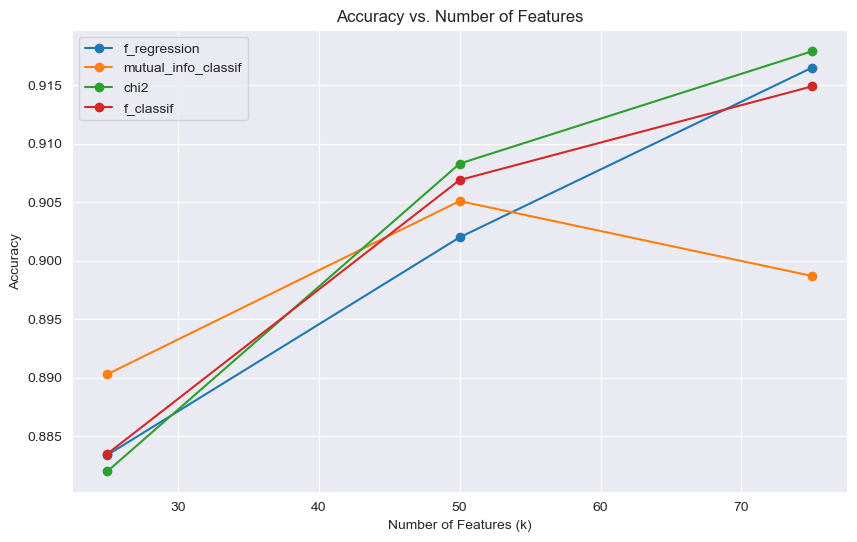

In [9]:
# Plot the results
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
for score_func_name, accuracies in score_values_rf.items():
    plt.plot(range(25, 100, 25), accuracies, marker="o", label=score_func_name)

plt.xlabel("Number of Features (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Features")
plt.legend()
plt.show()

In [ ]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(10, 6))
# for score_func_name, accuracies in score_values_rf.items():
#     plt.plot(range(1, 101, 25), accuracies, marker="o", label=score_func_name)

#     # Add dots and numbers to each record
#     for i, accuracy in enumerate(accuracies):
#         plt.text(i * 25 + 1, accuracy, f"{accuracy:.4f}", ha="center", va="bottom")

# plt.xlabel("Number of Features (k)")
# plt.ylabel("Accuracy")
# plt.title("Accuracy vs. Number of Features")
# plt.legend()
# plt.show()

In [ ]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(10, 6))
# for score_func_name, accuracies in score_values_knn.items():
#     plt.plot(range(1, 101, 25), accuracies, marker="o", label=score_func_name)

#     # Add dots and numbers to each record
#     for i, accuracy in enumerate(accuracies):
#         plt.text(i * 25 + 1, accuracy, f"{accuracy:.4f}", ha="center", va="bottom")

# plt.xlabel("Number of Features (k)")
# plt.ylabel("Accuracy")
# plt.title("Accuracy vs. Number of Features")
# plt.legend()
# plt.show()

In [ ]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(10, 6))
# for score_func_name, accuracies in score_values_xgb.items():
#     plt.plot(range(1, 101, 25), accuracies, marker="o", label=score_func_name)

#     # Add dots and numbers to each record
#     for i, accuracy in enumerate(accuracies):
#         plt.text(i * 25 + 1, accuracy, f"{accuracy:.4f}", ha="center", va="bottom")

# plt.xlabel("Number of Features (k)")
# plt.ylabel("Accuracy")
# plt.title("Accuracy vs. Number of Features")
# plt.legend()
# plt.show()

In [ ]:
import pandas as pd

for score_func_name, accuracies in score_values_rf.items():
    print(accuracies)

# data = [
#     {"dataset_name": "artificial", "feature_selection_method": "sffs", "classifier":"KNN", "best_num_features": 8, "best_score": 0.888},
#     {"dataset_name": "spam", "feature_selection_method": "sffs", "classifier":"KNN", "best_num_features": "-", "best_score": "-"}
# ]

# df = pd.DataFrame(data, columns=["dataset_name", "feature_selection_method", "classifier", "best_num_features", "best_score"])
# df.to_csv("results/sffs_results.csv", index=False)